In [1]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import operator

In [3]:
term_document_train = pd.read_csv("assets/td_train.tsv", index_col=0)
term_document_test = pd.read_csv("assets/td_test.tsv", index_col=0)

In [5]:
def top_words_per_topic(lda):
    words = np.array(term_document_train.columns)
    for key, topic in enumerate(lda.components_):
        print(f"Топ 10 слов для топика {key}:")
        print([words[index] for index in topic.argsort()[-10:]])
    print("")

In [12]:
def top_documents_per_topic(lda, pred):
    index_names = ['Topic' + str(i) for i in range(lda.n_components)]
    column_names = term_document_test.index
    df_topic_document = pd.DataFrame(np.transpose(pred), columns=column_names, index=index_names)
    df_topic_document = pd.DataFrame(
        df_topic_document.apply(lambda x: list(df_topic_document.columns[np.array(x).argsort()[::-1][:5]]),
                                axis=1).to_list(), columns=['1', '2', '3', '4', '5'])
    print(df_topic_document.to_string(), end='\n\n')

In [13]:
perplexities = {}
def calculate_LDA(n):
    lda = LDA(n_components=n)
    lda = lda.fit(term_document_train)
    pred = lda.transform(term_document_test)
    perplexity = lda.perplexity(term_document_test)
    print(f"Topic number: {lda.n_components}, perplexity: {perplexity}")
    perplexities[n] = round(perplexity, 2)

    top_words_per_topic(lda)
    top_documents_per_topic(lda, pred)

In [14]:
calculate_LDA(2)

Topic number: 2, perplexity: 4604.631739031568
Топ 10 слов для топика 0:
['know', 'article', 'god', 'use', 'writes', 'edu', 'com', 'would', 'one', 'subject']
Топ 10 слов для топика 1:
['edu', 'think', 'like', 'com', 'people', 'subject', 'one', 'article', 'writes', 'would']

                                 1                                2                                3                                4                                5
0          comp.graphics/39638.tsv          comp.graphics/39078.tsv         comp.windows.x/68012.tsv          comp.graphics/38852.tsv         comp.windows.x/67882.tsv
1  talk.politics.mideast/76468.tsv  talk.politics.mideast/77388.tsv  talk.politics.mideast/77365.tsv  talk.politics.mideast/77366.tsv  talk.politics.mideast/77371.tsv



In [15]:
calculate_LDA(5)

Topic number: 5, perplexity: 4343.63133296246
Топ 10 слов для топика 0:
['like', 'subject', 'com', 'think', 'article', 'god', 'people', 'writes', 'would', 'one']
Топ 10 слов для топика 1:
['good', 'one', 'would', 'year', 'game', 'team', 'article', 'edu', 'writes', 'subject']
Топ 10 слов для топика 2:
['think', 'us', 'know', 'subject', 'article', 'space', 'one', 'writes', 'people', 'would']
Топ 10 слов для топика 3:
['university', 'government', 'new', 'armenian', 'article', 'subject', 'turkish', 'one', 'gun', 'people']
Топ 10 слов для топика 4:
['like', 'system', 'organization', 'get', 'would', 'one', 'edu', 'use', 'com', 'subject']

                                    1                                  2                                  3                                 4                                  5
0        talk.religion.misc/84079.tsv       talk.religion.misc/84138.tsv       talk.religion.misc/84334.tsv  soc.religion.christian/21648.tsv              alt.atheism/54224.tsv
1    

In [16]:
calculate_LDA(10)

Topic number: 10, perplexity: 4458.3292525186425
Топ 10 слов для топика 0:
['get', 'may', 'writes', 'article', 'subject', 'use', 'com', 'would', 'people', 'one']
Топ 10 слов для топика 1:
['know', 'organization', 'com', 'like', 'one', 'article', 'edu', 'would', 'writes', 'subject']
Топ 10 слов для топика 2:
['games', 'would', 'go', 'nhl', 'season', 'year', 'play', 'hockey', 'game', 'team']
Топ 10 слов для топика 3:
['people', 'think', 'one', 'would', 'organization', 'edu', 'subject', 'article', 'com', 'writes']
Топ 10 слов для топика 4:
['computer', 'please', 'distribution', 'sale', 'edu', 'space', 'university', 'lines', 'organization', 'subject']
Топ 10 слов для топика 5:
['runs', 'game', 'first', 'team', 'baseball', 'output', 'last', 'entry', 'year', 'file']
Топ 10 слов для топика 6:
['think', 'subject', 'like', 'people', 'article', 'israel', 'one', 'writes', 'car', 'would']
Топ 10 слов для топика 7:
['use', 'think', 'chip', 'president', 'one', 'encryption', 'people', 'key', 'governm

In [17]:
calculate_LDA(20)

Topic number: 20, perplexity: 4518.068705497933
Топ 10 слов для топика 0:
['state', 'com', 'think', 'writes', 'article', 'government', 'gun', 'one', 'would', 'people']
Топ 10 слов для топика 1:
['article', 'jewish', 'people', 'writes', 'arab', 'law', 'would', 'jews', 'israeli', 'israel']
Топ 10 слов для топика 2:
['security', 'one', 'keys', 'government', 'use', 'would', 'clipper', 'chip', 'encryption', 'key']
Топ 10 слов для топика 3:
['fbi', 'fire', 'writes', 'lines', 'organization', 'article', 'subject', 'one', 'would', 'db']
Топ 10 слов для топика 4:
['players', 'la', 'cup', 'vs', 'pittsburgh', 'nhl', 'play', 'team', 'game', 'hockey']
Топ 10 слов для топика 5:
['edu', 'drives', 'bhj', 'disk', 'university', 'lines', 'sale', 'organization', 'subject', 'drive']
Топ 10 слов для топика 6:
['good', 'get', 'like', 'subject', 'would', 'article', 'com', 'one', 'writes', 'car']
Топ 10 слов для топика 7:
['keith', 'distribution', 'would', 'edu', 'lines', 'organization', 'article', 'subject', '

In [18]:
calculate_LDA(40)

Topic number: 40, perplexity: 5365.961948685547
Топ 10 слов для топика 0:
['island', 'naval', 'swap', 'expose', 'one', 'secret', 'war', 'south', 'new', 'db']
Топ 10 слов для топика 1:
['quadra', 'people', 'one', 'objective', 'food', 'article', 'subject', 'com', 'msg', 'writes']
Топ 10 слов для топика 2:
['turks', 'chz', 'armenians', 'lk', 'ck', 'armenia', 'oil', 'greek', 'turkey', 'turkish']
Топ 10 слов для топика 3:
['article', 'even', 'think', 'one', 'writes', 'government', 'like', 'get', 'would', 'people']
Топ 10 слов для топика 4:
['may', 'ron', 'people', 'one', 'like', 'com', 'would', 'subject', 'article', 'writes']
Топ 10 слов для топика 5:
['may', 'must', 'wire', 'program', 'ground', 'one', 'use', 'file', 'entry', 'output']
Топ 10 слов для топика 6:
['year', 'players', 'vs', 'season', 'nhl', 'games', 'play', 'hockey', 'game', 'team']
Топ 10 слов для топика 7:
['rights', 'jewish', 'one', 'genocide', 'armenians', 'war', 'turkish', 'people', 'jews', 'armenian']
Топ 10 слов для топи

In [36]:
perplexities

{2: 4443.63, 5: 4543.63, 10: 4658, 20: 4518.07, 40: 5365.96}

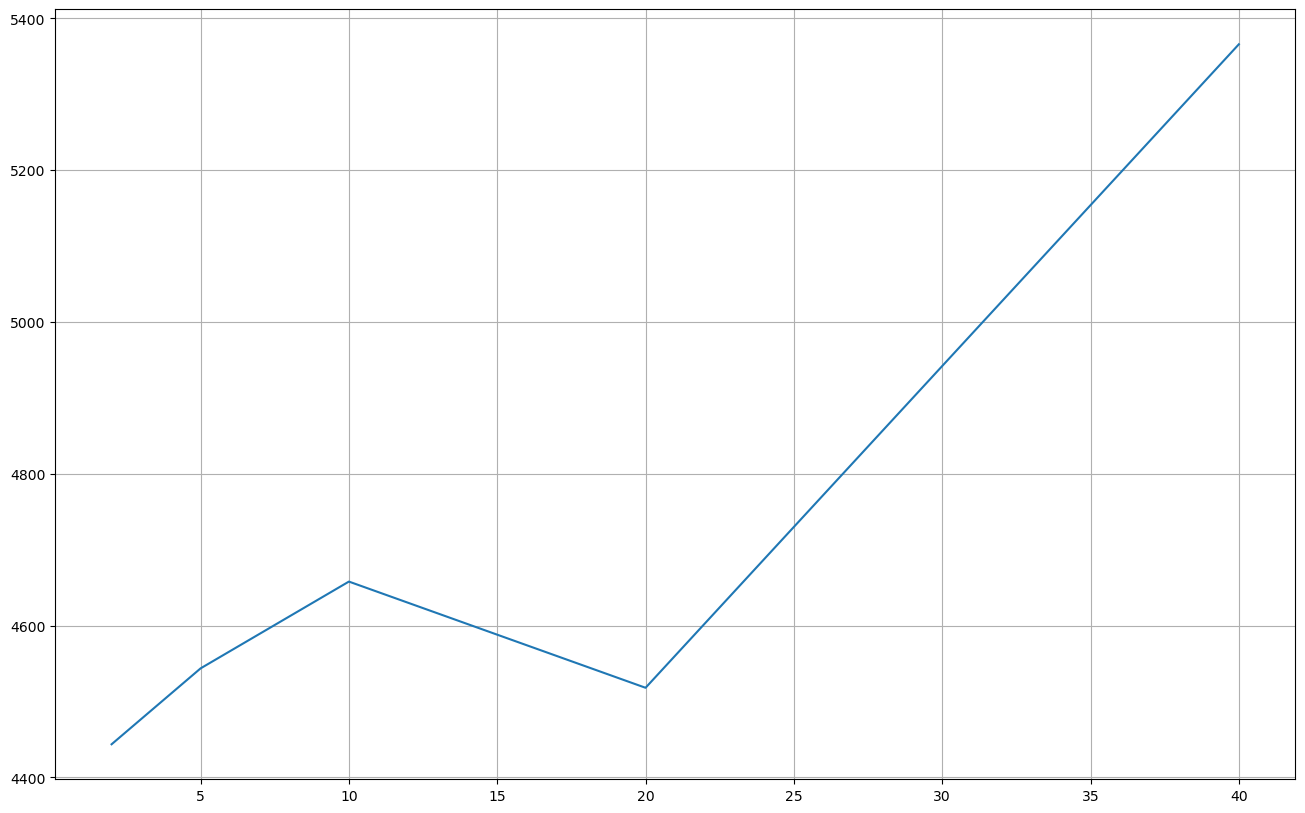

In [37]:
n_topics = list(perplexities.keys())
perplexity = list(perplexities.values())
plt.figure(figsize=(16, 10))
plt.plot(n_topics, perplexity)
plt.grid(True)
plt.show()

In [38]:
max = 0.0
best_degree = 3
for degree in range(1, 6):
    model = np.poly1d(np.polyfit(n_topics, perplexity, degree))
    r2 = r2_score(perplexity, model(n_topics))
    if r2 > max:
        max = r2
        best_degree = degree
print(best_degree)

4


c:\Users\ander\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


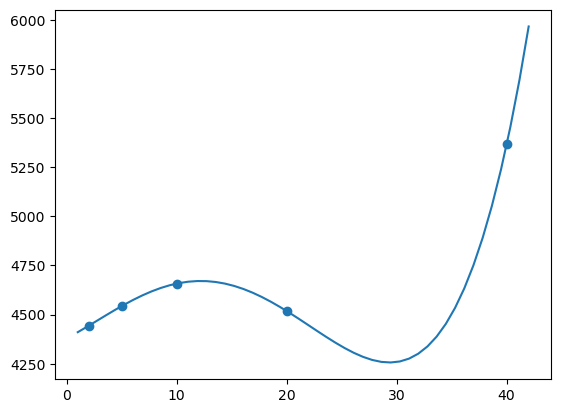

In [39]:
model = np.poly1d(np.polyfit(n_topics, perplexity, best_degree))
line = np.linspace(1, 42)
plt.scatter(n_topics, perplexity)
plt.plot(line, model(line))
plt.show()

In [45]:
result = {}
for iter in [5, 10, 20]:
    lda_model = LDA(n_components=20, max_iter=iter)
    lda_model = lda_model.fit(term_document_train)
    perplexity = lda_model.perplexity(term_document_test)
    print(f"N_components: {lda_model.n_components}, max_iter: {iter}, perplexity: {perplexity}")
    pred = lda_model.transform(term_document_test)
    result[iter] = (round(perplexity, 2), pred, iter)
result = sorted(result.values(), key=operator.itemgetter(0))
print(f"Best perplexity = {result[0][0]} ({result[0][2]} iter)")
best_pred = result[0][1]

N_components: 20, max_iter: 5, perplexity: 5084.896301524193
N_components: 20, max_iter: 10, perplexity: 4724.468758679909
N_components: 20, max_iter: 20, perplexity: 4474.521024323051
Best perplexity = 4474.52 (20 iter)


In [44]:
with open(f"assets/test_topics.tsv", 'w') as file:
    rows = ""
    for predict, filename in zip(best_pred, term_document_test.index):
        string = ""
        for pred in predict:
            string += '\t' + str(round(pred, 3))
        rows += filename + '\t' + string[1:] + '\n'
    file.write(rows)